In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [56]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [57]:
data = data.dropna()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [58]:
data['loan_grade'] = data['loan_grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [59]:
x = data[['person_income', 'loan_percent_income', 'loan_grade',]]
y = data['loan_status']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [61]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      4443
           1       0.71      0.67      0.69      1285

    accuracy                           0.87      5728
   macro avg       0.81      0.80      0.80      5728
weighted avg       0.86      0.87      0.86      5728



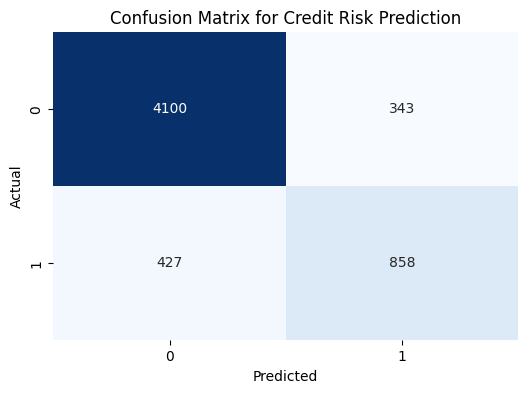

In [62]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Credit Risk Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

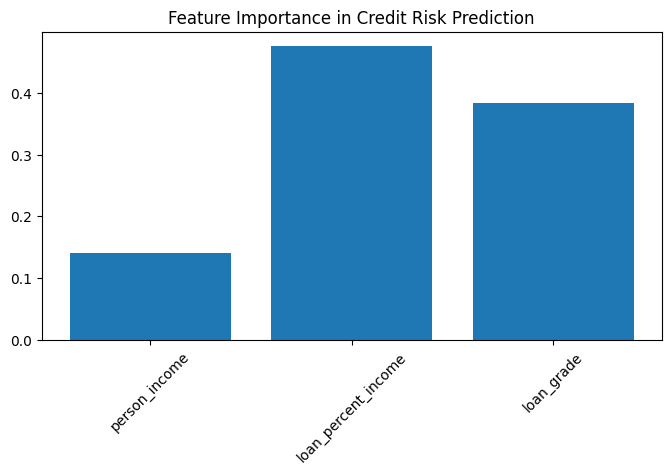

In [63]:
plt.figure(figsize=(8, 4))
plt.bar(x.columns, model.feature_importances_)
plt.xticks(rotation=45)
plt.title('Feature Importance in Credit Risk Prediction')
plt.show()